In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
classes = np.argmax(mnist.train.labels, axis=1) + 1

## Gasp, MNIST has an even class balance! this happens so much in real life!

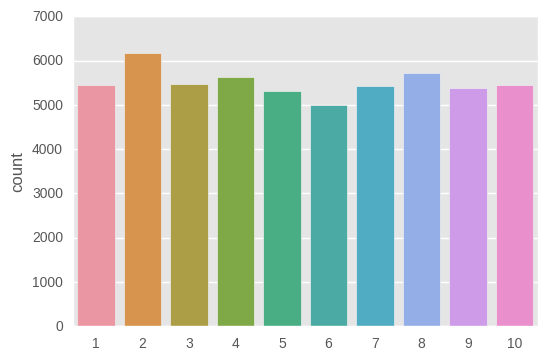

In [4]:
sns.countplot(classes);

### An image from mnist

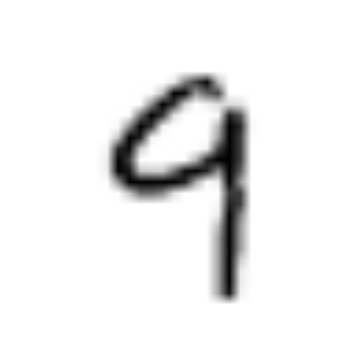

In [5]:
plt.imshow(mnist.train.images[8].reshape(28, 28))
plt.grid('off')
plt.axis('off');

In [6]:
mnist.train.images.shape # 55000 images flattened into 784x1 dim vectors

(55000, 784)

In [7]:
mnist.train.images[0].dtype

dtype('float32')

In [8]:
# input
x = tf.placeholder(tf.float32, [None, 784]) # None == any dimension

# model parameters
W = tf.Variable(tf.zeros([784, 10])) # can be modified by computation
b = tf.Variable(tf.zeros([10]))
# note: why do the tf docs init W to zero? what about symmetry breaking? 

y = tf.nn.softmax(tf.matmul(x, W) + b) 

In [9]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [11]:
init = tf.initialize_all_variables()

In [12]:
sess = tf.Session()
sess.run(init)

In [13]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
# Notes, if restart other notebooks that had running sessions if 
# BLAS error 

In [14]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.arg_max(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9202


In [15]:
sess.close()

In [3]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [4]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [17]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])


In [18]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [19]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [20]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [21]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

In [22]:
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [23]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

In [24]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [25]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [26]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [27]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.initialize_all_variables()

In [29]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
            x:batch_xs, y_: batch_ys, keep_prob: 1.0})
            print("step %d, training accuracy %g"%(i, train_accuracy))
        train_step.run(feed_dict={x:batch_xs, y_: batch_ys, keep_prob: 0.5})

    print("test accuracy %g"%accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.1
step 100, training accuracy 0.91
step 200, training accuracy 0.94
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accuracy 0.95
step 600, training accuracy 0.97
step 700, training accuracy 0.97
step 800, training accuracy 0.96
step 900, training accuracy 0.95
step 1000, training accuracy 0.96
step 1100, training accuracy 0.96
step 1200, training accuracy 0.95
step 1300, training accuracy 0.98
step 1400, training accuracy 0.98
step 1500, training accuracy 0.99
step 1600, training accuracy 1
step 1700, training accuracy 0.98
step 1800, training accuracy 0.98
step 1900, training accuracy 0.98
test accuracy 0.9819
